# Upload arquivos de intensidade (necessário rodar apenas uma vez)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import scipy.interpolate as inter
from google.colab import files
import sys as sys

uploaded = files.upload()

Saving espectro_gatorade.txt to espectro_gatorade.txt
Saving espectro_controle.txt to espectro_controle.txt
Saving espectro_corante.txt to espectro_corante.txt


# Cálculo da absorbância

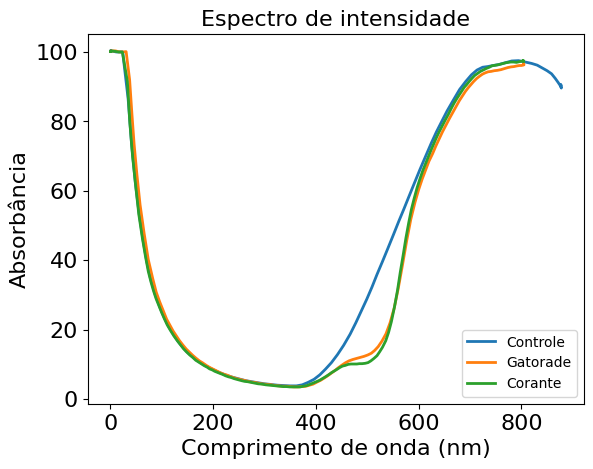

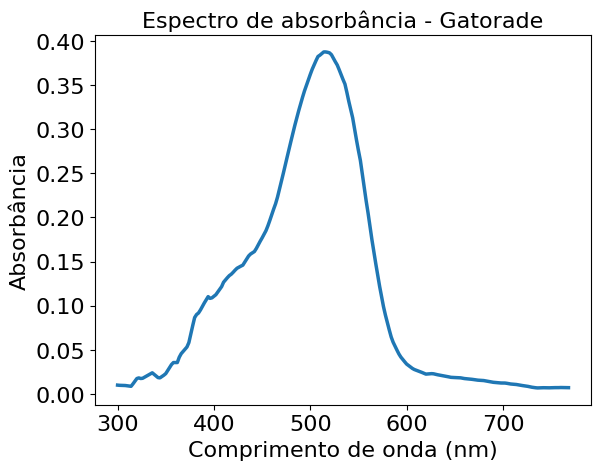

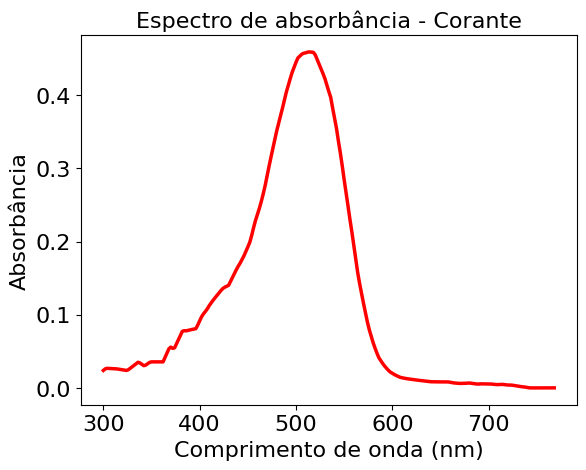

Absorbância máxima - Gatorade: 0.387
Comprimento de onda para absorbância máxima - Gatorade: 514.0


Absorbância máxima - Corante: 0.459
Comprimento de onda para absorbância máxima - Corante: 514.0


In [2]:
# Lê os dados de intensidade dos arquivos de texto (OBS: IMPORTANTE QUE OS DADOS POSSUAM O COMPRIMENTO DE ONDA EM nm NO EIXO X)
# OS ARQUIVOS COM OS DADOS DEVEM POSSUIR OS NOMES "espectro_controle.txt", "espectro_gatorade.txt" e "espectro_corante.txt"
# OS DADOS NÃO DEVEM POSSUIR TEXTO NEM VÍRGULAS (SUBSTITUIR AS VÍRGULAS POR PONTOS ANTES DO UPLOAD)
def readtxt(a):
  arq = open('%s' % a, 'r')
  texto1 = arq.readlines()
  arq.close()

  for i in range(len(texto1)):
      texto1[i] = texto1[i].split("\t")
      texto1[i] = [float(x) for x in texto1[i]]

  lambdaa=np.zeros(len(texto1))
  intens=np.zeros(len(texto1))

  for i in range(len(texto1)):
      lambdaa[i]=texto1[i][0]
      intens[i]=texto1[i][1]
  return [lambdaa,intens]

# Interpola os gráficos de intensidade do controle, gatorade e corante
func_control=inter.interp1d(readtxt('espectro_controle.txt')[0],readtxt('espectro_controle.txt')[1])
func_gatorade=inter.interp1d(readtxt('espectro_gatorade.txt')[0],readtxt('espectro_gatorade.txt')[1])
func_corante=inter.interp1d(readtxt('espectro_corante.txt')[0],readtxt('espectro_corante.txt')[1])

# Faz o gráfico de intensidade dos três conjuntos de dados
plt.title('Espectro de intensidade',fontsize=16)
plt.xlabel('Comprimento de onda (nm)',fontsize=16)
plt.ylabel('Absorbância',fontsize=16)
plt.plot(readtxt('espectro_controle.txt')[0],readtxt('espectro_controle.txt')[1],linewidth=2.0,label='Controle')
plt.plot(readtxt('espectro_gatorade.txt')[0],readtxt('espectro_gatorade.txt')[1],linewidth=2.0,label='Gatorade')
plt.plot(readtxt('espectro_corante.txt')[0],readtxt('espectro_corante.txt')[1],linewidth=2.0,label='Corante')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend()
plt.savefig('./intensidade.png',dpi=100)
plt.show()
print('\n')

# Gera os dados do espectro de absorção para o gatorade e o corante
lambda_plot=np.arange(300,770,2)
Abs_gatorade=-np.log10(func_gatorade(lambda_plot)/func_control(lambda_plot))
Abs_corante=-np.log10(func_corante(lambda_plot)/func_control(lambda_plot))

# Faz o gráfico de absorção do gatorade
plt.plot(lambda_plot,Abs_gatorade,linewidth=2.5)
plt.title('Espectro de absorbância - Gatorade',fontsize=16)
plt.xlabel('Comprimento de onda (nm)',fontsize=16)
plt.ylabel('Absorbância',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('./absorbancia_gatorade.png',dpi=100)
plt.show()
print('\n')

# Salva o gráfico de absorbância do Gatorade no arquivo "absorbancia_gatorade.txt"
f1=open('./absorbancia_gatorade.txt','w')
for i in range(len(lambda_plot)):
  print("{:.1f}".format(lambda_plot[i]),file=f1,end="\t")
  print("{:.5f}".format(Abs_gatorade[i]),file=f1,end="\n")
f1.close()

# Faz o gráfico de absorção do corante
plt.plot(lambda_plot,Abs_corante,linewidth=2.5,color='red')
plt.title('Espectro de absorbância - Corante',fontsize=16)
plt.xlabel('Comprimento de onda (nm)',fontsize=16)
plt.ylabel('Absorbância',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('./absorbancia_corante.png',dpi=100)
plt.show()

# Salva o gráfico de absorbância do corante no arquivo "absorbancia_corante.txt"
f1=open('./absorbancia_corante.txt','w')
for i in range(len(lambda_plot)):
  print("{:.1f}".format(lambda_plot[i]),file=f1,end="\t")
  print("{:.5f}".format(Abs_corante[i]),file=f1,end="\n")
f1.close()

# Mostra a absorbância máxima e o comprimento de onda para o qual ela ocorre tanto para o gatorade como para o corante
print('Absorbância máxima - Gatorade: %.3f' % np.max(Abs_gatorade))
print('Comprimento de onda para absorbância máxima - Gatorade: %.1f' % lambda_plot[np.argmax(Abs_gatorade)])
print('\n')
print('Absorbância máxima - Corante: %.3f' % np.max(Abs_corante))
print('Comprimento de onda para absorbância máxima - Corante: %.1f' % lambda_plot[np.argmax(Abs_corante)])